In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [22]:
data = pd.read_csv('data_scaled.csv')
data

,SP,RP,SRP,LRP,FHP,BHP,RANK,RANKDIFF,SA,SRA,FHA,BALANCE,WON
0,0.600,0.400,0.244,0.756,0.511,0.489,1,-0.062078,0.200,-0.512,0.022,0.353155,1.0
1,0.666,0.334,0.194,0.806,0.171,0.829,12,0.062078,0.332,-0.612,-0.658,0.879854,-1.0
2,0.522,0.478,0.295,0.705,0.720,0.280,3,-0.039504,0.044,-0.410,0.440,0.450243,1.0
3,0.558,0.442,0.205,0.795,0.617,0.383,10,0.039504,0.116,-0.590,0.234,0.478155,-1.0
4,0.561,0.439,0.157,0.843,0.578,0.422,3,0.011287,0.122,-0.686,0.156,0.492718,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.552,0.448,0.421,0.579,0.702,0.298,368,2.020364,0.104,-0.158,0.404,0.311893,-1.0
354,0.555,0.445,0.361,0.639,0.638,0.362,28,-0.152374,0.110,-0.278,0.276,0.310680,-1.0
355,0.525,0.475,0.275,0.725,0.615,0.385,55,0.152374,0.050,-0.450,0.230,0.350728,1.0
356,0.512,0.488,0.179,0.821,0.666,0.334,10,-0.744939,0.024,-0.642,0.332,0.513350,1.0


In [23]:
columns = ['SP', 'RP', 'SRP', 'LRP', 'FHP', 'BHP', 'RANKDIFF', 'SA', 'SRA', 'FHA', 'BALANCE']
X = data[columns]
y = data.WON

Accuracy: 0.7222222222222222
F1 score: 0.7058823529411765


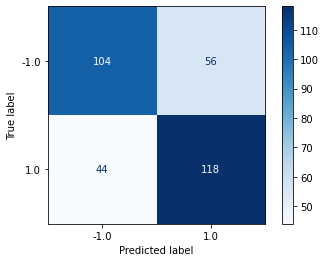

In [16]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=3)
model = LogisticRegression(C=1, random_state=1, solver='liblinear')
model.fit(X_trainval, y_trainval)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))
plot_confusion_matrix(model, X_trainval, y_trainval, cmap='Blues');

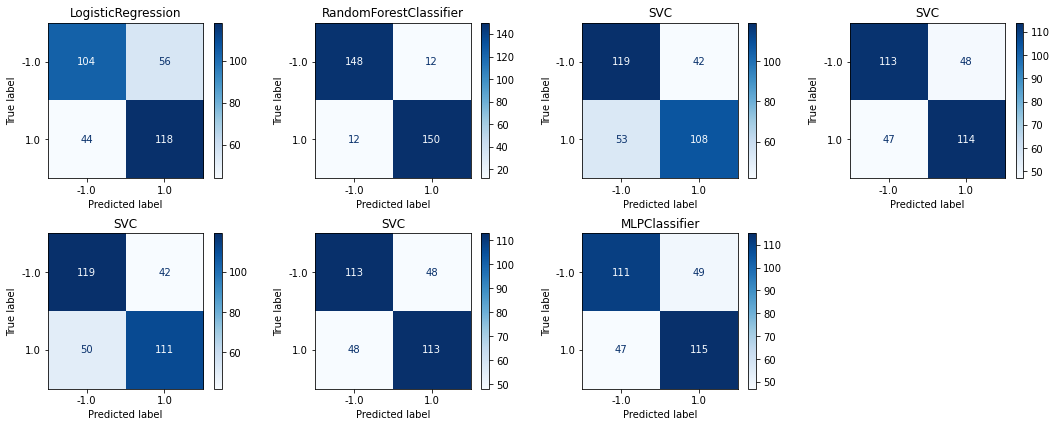

In [62]:
trainval = []
for i in [3, 4,20,20,20,20,4]:
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=i)
    trainval.append([X_trainval, y_trainval])

classifiers = [LogisticRegression(C=1, random_state=1, solver='liblinear'), RandomForestClassifier(max_depth=80, max_features=4, min_samples_leaf=4,
                       n_estimators=200, random_state=1),SVC(C=0.2, gamma=1, kernel='linear', random_state=1),SVC(C=0.1,kernel='rbf', gamma=1, random_state=1) 
,SVC(C=0.01, gamma=1, kernel='poly', random_state=1), SVC(C=0.3, gamma=0.1, kernel='sigmoid', random_state=1),
              MLPClassifier(activation='relu', hidden_layer_sizes= 2, learning_rate='constant', max_iter=200, solver='lbfgs')
]
for cls in range(len(classifiers)):
    classifiers[cls].fit(trainval[cls][0],trainval[cls][1])
    
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,6))
count =0
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          trainval[count][0],
                          trainval[count][1],
                          ax=ax, 
                          cmap='Blues')
    ax.title.set_text(type(cls).__name__)
    count+=1
fig.delaxes(axes[1,3])
plt.tight_layout()  
#plt.savefig('confusionmatrices.pdf', dpi=300)
plt.show()

Text(0.5, 1.0, 'Random Forest')

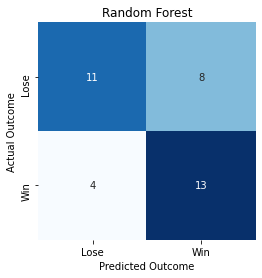

In [72]:
import seaborn as sns
data = np.array([[11,  8],
       [ 4, 13]])
fig, ax = plt.subplots()
ax = sns.heatmap(data, annot = True, fmt = '', cmap='Blues', cbar=False, square=True)
ax.xaxis.set_ticklabels(['Lose','Win'])
ax.yaxis.set_ticklabels(['Lose','Win'])
ax.set_xlabel('Predicted Outcome')
ax.set_ylabel('Actual Outcome');
ax.set_title('Random Forest')
#plt.savefig('confusionmatrix', dpi=300)

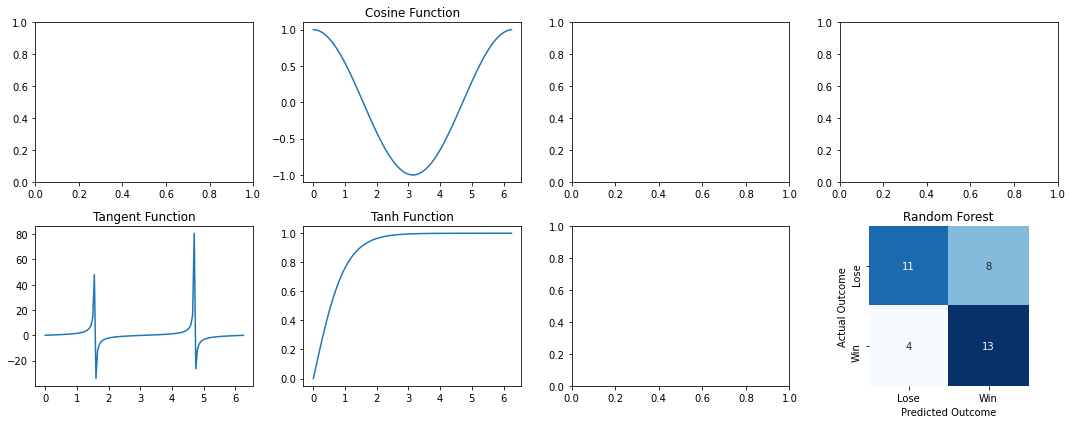

In [99]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math

# Get the angles from 0 to 2 pie (360 degree) in narray object
X = np.arange(0, math.pi*2, 0.05)

# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
Y1 = np.sin(X)
Y2 = np.cos(X)
Y3 = np.tan(X)
Y4 = np.tanh(X)

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 4, figsize=(15,6))

# For Sine Function
axis[0, 0] = sns.heatmap(data, annot = True, fmt = '', cmap='Blues', cbar=False, square=True)
axis[0, 0].xaxis.set_ticklabels(['Lose','Win'])
axis[0, 0].yaxis.set_ticklabels(['Lose','Win'])
axis[0, 0].set_xlabel('Predicted Outcome')
axis[0, 0].set_ylabel('Actual Outcome');
axis[0, 0].set_title('Random Forest')

# For Cosine Function
axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("Cosine Function")

# For Tangent Function
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("Tangent Function")

# For Tanh Function
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("Tanh Function")

# Combine all the operations and display
figure.tight_layout()
plt.show()


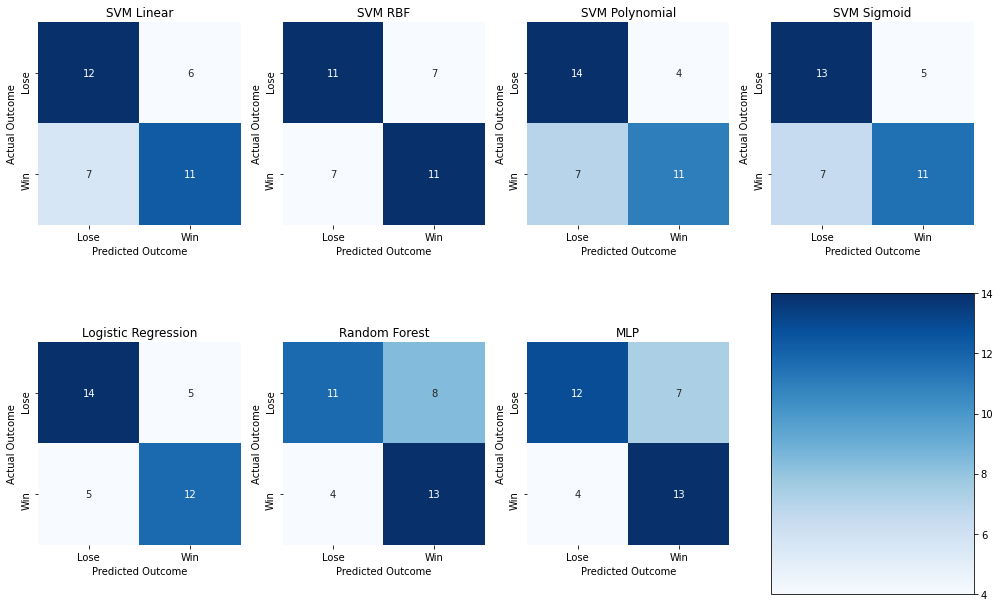

In [4]:
fig, axs = plt.subplots(nrows=2,ncols=4, figsize=(14,9))

def heatmap(data,a,b):
    return sns.heatmap(data, annot = True, cmap='Blues', cbar=False, square=True,yticklabels=['Lose','Win'], xticklabels=['Lose','Win'],ax=axs[a,b])

heatmap(np.array([[11,  8],
       [ 4, 13]]),1,1)
heatmap(np.array([[12,  6],
       [ 7, 11]]),0,0)
heatmap(np.array([[11,  7],
       [ 7, 11]]),0,1)
heatmap(np.array([[14, 4],
       [ 7, 11]]),0,2)
heatmap(np.array([[13, 5],
       [ 7, 11]]),0,3)
heatmap(np.array([[14, 5],
       [ 5, 12]]),1,0)
heatmap(np.array([[12, 7],
       [ 4, 13]]),1,2)


for i in range(2):
    for j in range(3):
        axs[i,j].set_xlabel('Predicted Outcome')
        axs[i,j].set_ylabel('Actual Outcome')
axs[0,3].set_xlabel('Predicted Outcome')
axs[0,3].set_ylabel('Actual Outcome')

axs[0,0].set_title('SVM Linear')
axs[0,1].set_title('SVM RBF')
axs[0,2].set_title('SVM Polynomial')
axs[0,3].set_title('SVM Sigmoid')
axs[1,0].set_title('Logistic Regression')
axs[1,1].set_title('Random Forest')
axs[1,2].set_title('MLP')


fig.colorbar(axs[0,2].collections[0], cax=axs[1,3])
plt.savefig('confusionmatrices.pdf', dpi=300)
fig.tight_layout()
plt.show()